In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "forces"             # cohort name

# data_method = "data_alpha"        # method name
# data_method = "data_beta"        # method name
data_method = "eval_single"         # method name
eval_method = "eval_single"        # method name
# eval_method = "eval_nominal"        # method name

scene = "mid_gate"                  # scene name

courses = [ 
    # "linr_f5",
    "robustness_track_f5",
    ]   

roster = [
    "Maverick",
    ]

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Using existing observation data...

Output()

======================================================================
Cohort : forces
Network: commNet
====================================================================== 
----------------------------------------------------------------------
Student: Maverick | Epochs: 50    | Data Size: 295.0/295.0
 Time: 0h 0m 20s   | Train: 0.0116 | Test: 0.0124
 ======================================================================

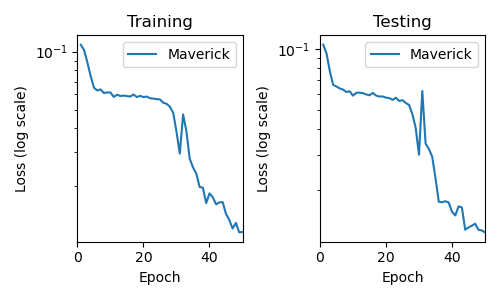

In [4]:
# Second Stage Training
tp.train_roster(cohort,roster,"commNet",50,regen=False)

pl.plot_losses(cohort,roster,"commNet")

Plotting trajectories for expert...

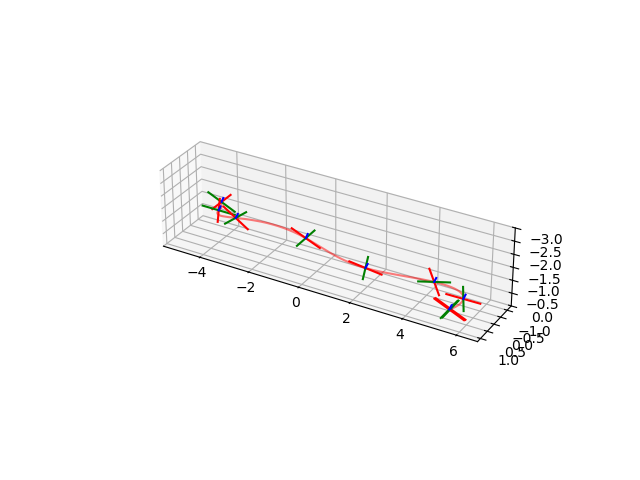

Plotting trajectories for Maverick...

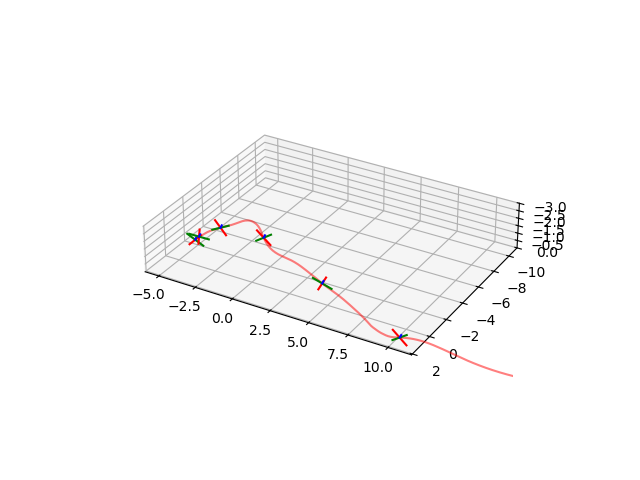

                      Deployment Summary                      
┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot    ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert   │   0.15   │   0.15   │ 1.00 │ 189.50  │  145.67  │
│ Maverick │  14.42   │  14.42   │ 0.10 │ 534.45  │  95.23   │
└──────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,
                     mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)